In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!ls *.txt

ford_fulkerson.txt
in_graph.txt
test_graph.txt


In [32]:
!ls 'Social Network Data'

data_exploration.ipynb
facebook
facebook_combined.txt
files description.txt


In [210]:
graph = nx.Graph()

In [211]:
file_name = 'Social Network Data/facebook_combined.txt'
out_name = 'edge_list.txt'

In [212]:
edge_list = []
with open(file_name) as file:
    for row in file:
        params = list(map(lambda x: int(x), row.split()))
        conn = (params[0], params[1])
        if (len(params) > 2):
            conn += (params[2], )
        
        edge_list.append(conn)
weighted = len(edge_list[0]) > 2
len(edge_list)

88234

In [218]:
#edge_list = edge_list[5200:5300] + edge_list[8450:8550] + edge_list[83100:83300]

In [215]:
weights = []
path_edges = []
with open(out_name) as file:
    for l in file:
        edges = list(map(lambda x: int(x), l.split()))
        path_edges.append((edges[0], edges[1]))
        if len(edges)==3:
            weights.append(edges[2])
path_edges

[(586, 376), (376, 567), (567, 3437), (3437, 3938)]

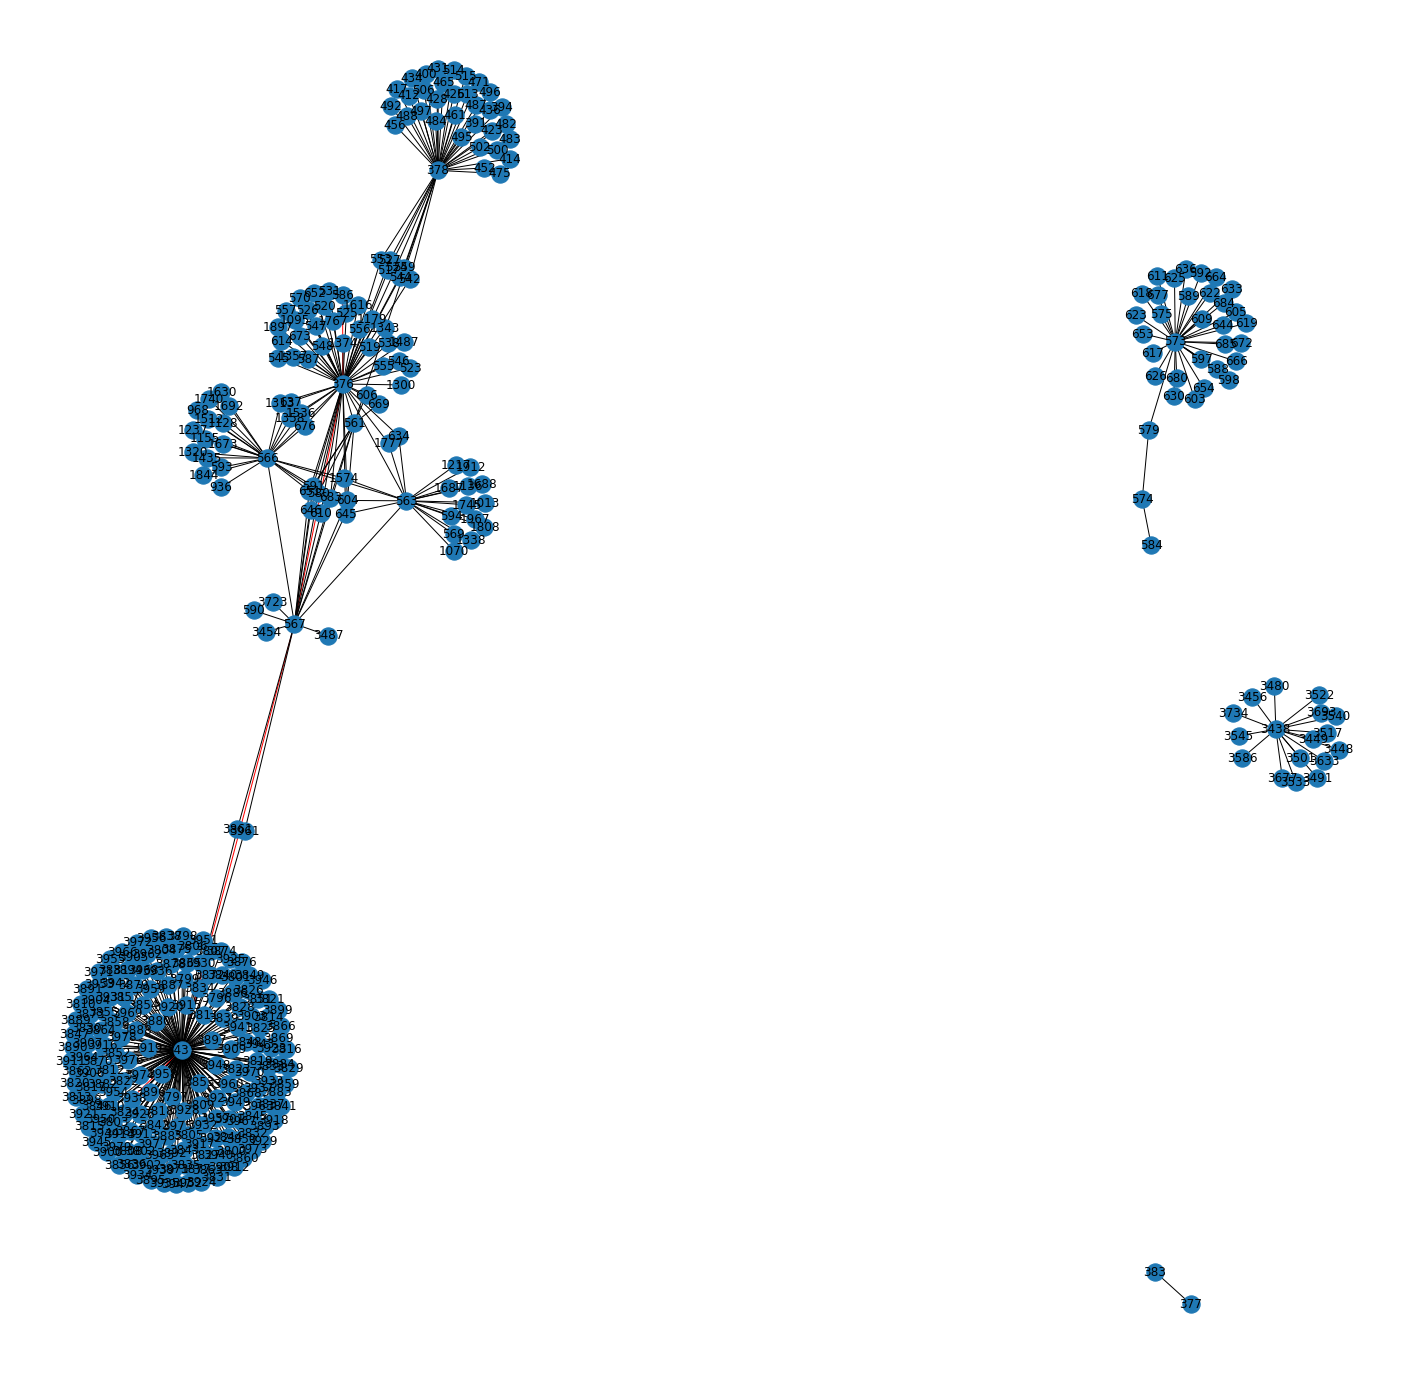

In [216]:
if weighted:
    plt.figure(num=None, figsize=(30, 30))
    plt.axis('off')
    graph.add_weighted_edges_from(edge_list)
    labels = nx.get_edge_attributes(graph,'weight')
    edge_colors = ['red' if edge in path_edges or (edge[1], edge[0]) in path_edges else 'black' for edge in graph.edges]
    pos = nx.spring_layout(graph)
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)
    nx.draw(graph, pos=pos, edge_color=edge_colors, with_labels=True)
else:
    plt.figure(num=None, figsize=(25, 25))
    plt.axis('off')
    graph.add_edges_from(edge_list)
    pos = nx.spring_layout(graph)
    edge_colors = ['red' if edge in path_edges or (edge[1], edge[0]) in path_edges else 'black' for edge in graph.edges]
    nx.draw(graph, pos=pos, edge_color=edge_colors, with_labels=True)

<h1 style='color:green; font-size:40px'>Fulkerson algorithm<h1>

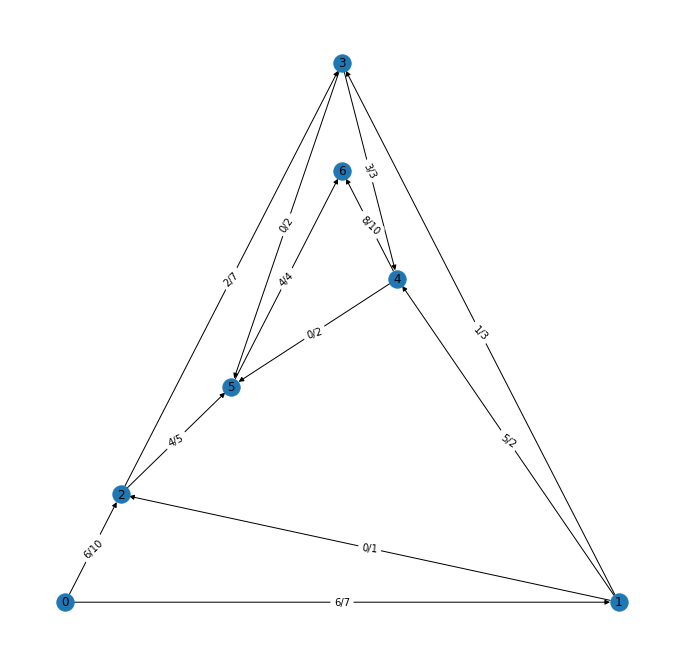

In [175]:
fulkerson = nx.DiGraph()
edge_weights = [edge[2] for edge in edge_list]
plt.figure(num=None, figsize=(12, 12))
plt.axis('off')
fulkerson.add_weighted_edges_from(edge_list)
labels = nx.get_edge_attributes(fulkerson,'weight')
for i, k in enumerate(sorted(labels)):
    labels[k] = f'{weights[i]}/{edge_list[i][2]}'
nx.draw_networkx_edge_labels(fulkerson, pos=pos, edge_labels=labels)
pos = nx.planar_layout(fulkerson)

nx.draw(fulkerson, pos=pos, with_labels=True)

In [202]:
for i, p in enumerate(edge_list):
    if p in path_edges or (p[1], p[0]) in path_edges:
        print(i)

5224
5227
8511
83242
